<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [Autocorrelation](05.10-Autocorrelation.ipynb) | [Contents](Index.ipynb) | [6. Spatial Data](06.00- Spatial-Data.ipynb) >

## 5.11 不确定的时间间隔

很多时候，我们得到了大量的数据集合。我们希望看看这些集合的行为。让我们首先从生成集合开始，然后绘制它们。在这个例子中，首先我们产生正弦行为的信号。然后，我们使用`vstack`来堆栈数据，即使用许多一维数据来制作二维数组。此后，我们在这些数据中混杂一些噪音，以至于集合看上去有些不同。我们使用`T`属性转置数据进行绘图，否则将在x轴上绘制集合而不是时间。

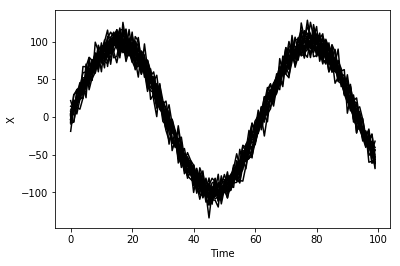

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# generate some data
x = 100*np.sin(np.linspace(0,10,100))
X = np.vstack([x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x])
e = 10*np.random.randn(20,100)

X_err = X+e

plt.plot(X_err.T, 'k')
plt.xlabel('Time')
plt.ylabel('X')
plt.show()

<center>图5.19:各种数据集合</center>

图5.19显示了这些集合的图形。我们看到所有的集合都表现得很相似。但是我们不能够使用这张图推断出任何更多关于集合的行为。可视化集合的一个更好的方法是使用不同的不确定区间及平均值。我们可以使用`st.scoreatpercentile`函数计算在不同百分位数的不确定性区间。我们计算第10、50和90的百分位数。第50的百分位是中位数。我们绘制是中位数而不是平均值，因为如果数据中有许多离群值，则中位数提供了更好地了解整体的行为。图5.20显示了集合的中位数、第10、第90百分位。使用这个图，我们可以看出，这个集合的分布不尽相同；在峰谷相对较多，在其他地方则较少。

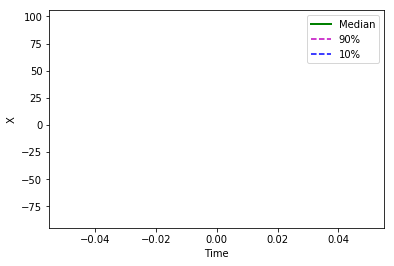

In [46]:
ll = st.scoreatpercentile(X_err, 10) # 10th percentile
ml = st.scoreatpercentile(X_err, 50) # 50th percentile
ul = st.scoreatpercentile(X_err, 90) # 90th percentile
"""
ll = []
ml = []
ul = []

for i in range(len(X_err)):
    ll.append(st.scoreatpercentile(X_err[i], 10))
    ml.append(st.scoreatpercentile(X_err[i], 50))
    ul.append(st.scoreatpercentile(X_err[i], 90))
"""    
plt.plot(ml, 'g', lw=2, label='Median')
plt.plot(ul, '--m', label='90%')
plt.plot(ll, '--b', label='10%')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend(loc='best')
plt.show()

<center>图5.20：由集合估计的中位数和不确定性区间</center>

不确定性区间可以由阴影区域绘制出。`plt.fill_between`提供了在两个数组之间填充颜色的选项，并可用于绘制阴影区域。

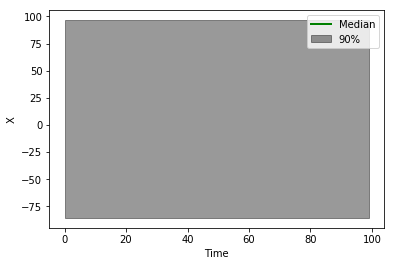

In [16]:
plt.plot(ml, 'g', lw=2, label='Median')
plt.fill_between(range(100), ul, ll, color='k', alpha=0.4, label='90%')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend(loc='best')
plt.show()

<center>图5.21:由集合估计的中位数和不确定性区间。不确定性区间使用阴影区域显示。</center>

图5.21显示了使用阴影区域的不确定性图。